# Exploratory Data Analysis (EDA)
In this Exploratory Data Analysis (EDA), we aim to gain insights into our dataset using Python libraries such as pandas, matplotlib, and seaborn. The dataset contains various network flow features, and we'll explore patterns, relationships, and distributions to better understand the data.

**Table of Content**
- Data overview
  - Descriptive Statistics 
- Data Visualisation
  - Analysis of Flags
  - Categorical Analysis
  - Source and Destination IP analysis
  - Packet analysis
  - Temporal Analysis
  - IAT
  - Header Lenght
  - Flow Information
  - Subflow Information
  - Active and idle Duration Statistics
  - Ratios and Window sizes
- Saving cleaned data

We start by loading the cleaned up dataset into a pandas DataFrame:

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [128]:
df_origin = pd.read_csv('Android_Malware_clean.csv', low_memory=False)
df = df_origin.copy()

In [129]:
df.head(10)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,2017-06-13 11:52:39,37027,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.014638,3.702700e+04,0.000000e+00,37027.0,37027.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,32,32,27.007319,27.007319,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000,0.000000,1.0,0.0,1.0,0.0,2994.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,2017-06-13 11:52:39,36653,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.565793,3.665300e+04,0.000000e+00,36653.0,36653.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,32,32,27.282896,27.282896,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000,0.000000,1.0,0.0,1.0,0.0,2860.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,2017-06-13 11:52:42,534099,8,12,1011.0,11924.0,581.0,0.0,126.375,207.799311,1460.0,0.0,993.666667,656.474376,24218.356522,37.446241,2.811047e+04,4.314810e+04,158676.0,8.0,481340.0,6.876286e+04,6.237618e+04,158676.0,449.0,487990.0,4.436273e+04,86342.042540,217790.0,8.0,0.0,180,244,14.978496,22.467745,0.0,1460.0,615.952381,672.744786,452585.547619,0.0,0.0,1.0,0.0,0.0,1.0,646.750000,126.375,993.666667,8.0,1011.0,12.0,11924.0,65535.0,63441.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,2017-06-13 11:52:43,9309,3,0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,322.268772,4.654500e+03,5.137131e+03,8287.0,1022.0,9309.0,4.654500e+03,5.137131e+03,8287.0,1022.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,60,0,322.268772,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000,0.000000,3.0,0.0,0.0,0.0,65535.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,2017-06-13 11:52:42,19890496,8,6,430.0,5679.0,218.0,0.0,53.750,99.538578,1460.0,0.0,946.500000,710.412204,307.131607,0.703854,1.530038e+06,5.377887e+06,19426714.0,7.0,19890496.0,2.841499e+06,7.314093e+06,19426714.0,639.0,410964.0,8.219280e+04,154845.683018,355945.0,7.0,0.0,180,124,0.402202,0.301652,0.0,1460.0,407.266667,626.958471,393076.923810,0.0,0.0,1.0,0.0,0.0,0.0,436.357143,53.750,946.500000,8.0,430.0,6.0,5679.0,65535.0,64022.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
5,10.42.0.211-23.208.43.179-50186-443-6,10.42.0.211,50186,23.208.43.179,443.0,6.0,2017-06-13 11:52:43,19196263,5,2,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.3646

# Data Overview
To get a quick overview of the dataset, we check its basic information.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355626 entries, 0 to 355625
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      355626 non-null  object 
 1   Source IP                    355626 non-null  object 
 2   Source Port                  355626 non-null  int64  
 3   Destination IP               355626 non-null  object 
 4   Destination Port             355626 non-null  float64
 5   Protocol                     355626 non-null  float64
 6   Timestamp                    355626 non-null  object 
 7   Flow Duration                355626 non-null  int64  
 8   Total Fwd Packets            355626 non-null  int64  
 9   Total Backward Packets       355626 non-null  int64  
 10  Total Length of Fwd Packets  355626 non-null  float64
 11  Total Length of Bwd Packets  355626 non-null  float64
 12  Fwd Packet Length Max        355626 non-null  float64
 13 

## Descriptive Statistics
Next, we explore descriptive statistics for numerical columns. This provides us with summary statistics such as mean, standard deviation, and quartiles for numerical features.

In [131]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,355626.000000,355626.000000,355626.000000,3.556260e+05,355626.000000,355626.000000,3.556260e+05,3.556260e+05,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,355626.000000,3.556260e+05,3.556260e+05,3.556260e+05,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,3.556260e+05,355626.000000,3.556260e+05,355626.000000,355626.000000,355626.000000,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05
mean,39138.304382,5198.782415,8.335321,1.092987e+07,7.357412,10.494593,6.791997e+02,1.129421e+04,212.001524,12.520283,59.644118,79.526313,320.406978,23.057701,168.537248,123.481423,8.399002e+04,5.494626e+03,3.175841e+06,2.426832e+06,9.448630e+06,2.057905e+06,7.540020e+06,3.206522e+06,1.934147e+06,6.253339e+06,2.079854e+06,5.632490e+06,9.461668e+05,1.407311e+06,4.709314e+06,3.426236e+05,0.065442,-7.601343e+05,-1.580875e+06,4.685547e+03,814.702967,8.413744,374.616814,115.158944,144.896934,71484.728363,0.016669,0.065442,0.331337,0.430964,0.204122,0.556461,127.433405,59.644118,168.537248,7.357412,6.791997e+02,10.494593,1.129421e+04,23386.883271,2032.585548,1.524405,-2.831850e+04,1.628143e+05,2.195225e+04,1.851564e+05,1.456534e+05,4.025724e+06,3.182527e+05,4.304876e+06,3.779037e+06
std,17866.230855,14350.915363,4.567164,2.180870e+07,67.005199,191.679025,1.941864e+04,2.763881e+05,366.936836,58.296582,119.309538,154.228963,540.177605,59.008405,311.333194,229.667556,9.112749e+05,3.913525e+04,8.459910e+06,6.202486e+06,1.829201e+07,7.922457e+06,1.843196e+07,8.859206e+06,6.110724e+06,1.447382e+07,8.166515e+06,1.816018e+07,4.583240e+06,5.227303e+06,1.517932e+07,3.750299e+06,0.247305,2.090467e+08,4.385679e+08,3.625932e+04,8590.264143,21.321284,563.917454,193.967289,224.699241,137222.148679,0.128029,0.247305,0.470695,0.495212,0.403059,0.635995,199.981517,119.309538,311.333194,67.005199,1.941864e+04,191.679025,2.763881e+05,30744.982569,8532.735513,14.938322,5.543875e+06,8.817765e+05,2.860244e+05,1.019477e+06,8.423659e+05,1.441518e+07,2.882901e+06,1.514008e+07,1.407042e+07
min,0.000000,0.000000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.000000e+06,-1.000000e+00,0.000000e+00,-1.000000e+00,-4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-7.533332e+10,-1.436

# Data Visualization

## Analysis of Flags

In [132]:
flag_columns = ['FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Fwd PSH Flags']
flag_df = df[flag_columns]

flag_summary = flag_df.describe()

for column in flag_columns:
    unique_values = flag_df[column].unique()
    print(f'Unique values for {column}: {unique_values}')

flag_summary

Unique values for FIN Flag Count: [0. 1.]
Unique values for SYN Flag Count: [0. 1.]
Unique values for PSH Flag Count: [0. 1.]
Unique values for ACK Flag Count: [1. 0.]
Unique values for URG Flag Count: [1. 0.]
Unique values for Fwd PSH Flags: [0. 1.]


,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Fwd PSH Flags
count,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000,355626.000000
mean,0.016669,0.065442,0.331337,0.430964,0.204122,0.065442
std,0.128029,0.247305,0.470695,0.495212,0.403059,0.247305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For most of the traffic, the 'FIN Flag', 'SYN Flag', 'PSH Flag', 'ACK Flag', and 'URG Flag' are zero (0), as indicated by the 25th, 50th (median), and 75th percentiles. The 'PSH Flag' has a higher mean compared to other flags, suggesting that a significant portion of the traffic has the PSH (Push) flag set. The 'Fwd PSH Flags' column also indicates whether the forward PSH flag was set or not, with similar characteristics to the other flags. The maximum value for each flag count is 1, indicating that there are instances where these flags are set. The 'count' column title might be misleading, as the data seems to show whether the flag was set or not, rather than the count of each flag.


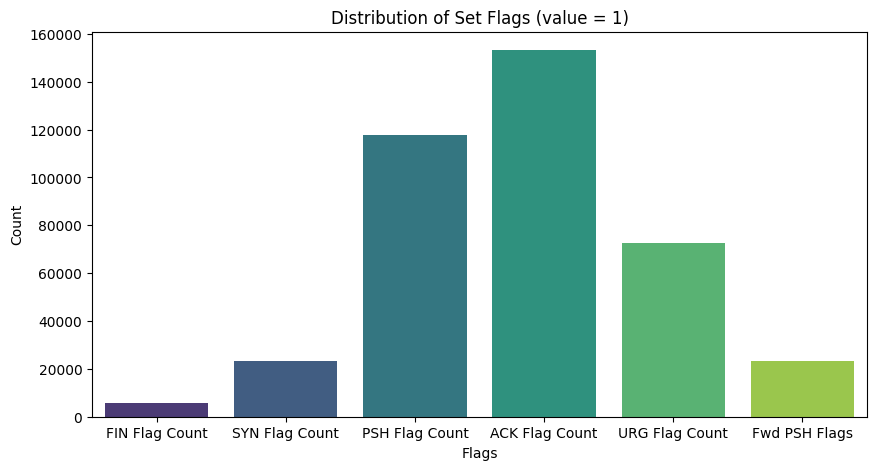

ACK Flag Count: 153262
PSH Flag Count: 117832
URG Flag Count: 72591
SYN Flag Count: 23273
Fwd PSH Flags: 23273
FIN Flag Count: 5928


In [133]:
# Filter the DataFrame to show only flags when they are set (value = 1)
set_flags_df = flag_df[flag_df == 1].melt().dropna()

# Bar plot for the distribution of set flags
plt.figure(figsize=(10, 5))
sns.countplot(data=set_flags_df, x='variable', palette='viridis')
plt.title('Distribution of Set Flags (value = 1)')
plt.xlabel('Flags')
plt.ylabel('Count')
plt.show()

value_counts = set_flags_df['variable'].value_counts()
for flag, count in value_counts.items():
    print(f'{flag}: {count}')

**ACK Flag Count: 153,262 -** The Acknowledgment (ACK) flag is frequently set, suggesting a significant amount of bidirectional communication or acknowledgment in the network traffic.

**PSH Flag Count: 117,832 -** The Push (PSH) flag is set in a substantial number of instances. This flag is often associated with data push requests, indicating a need for timely data delivery.

**URG Flag Count: 72,591 -** The Urgent (URG) flag is set in a considerable number of cases. This flag indicates that the data in the packet is urgent and should be prioritized.

**SYN Flag Count: 23,273 -** The Synchronize (SYN) flag is set in a lesser number of instances. SYN flags are typically associated with the initiation of a connection.

**FIN Flag Count: 5,928 -** The Finish (FIN) flag is set in a relatively small number of cases. FIN flags are often used to indicate the termination of a connection.

**Fwd PSH Flags: 23,273 -** The Forward Push (Fwd PSH) flag is set in the same number of instances as the SYN flag. This flag is often associated with data push requests in the forward direction.

The higher counts for ACK and PSH flags may indicate regular data transmission and acknowledgment patterns, while the lower counts for SYN and FIN flags suggest fewer instances of connection establishment and termination. The URG flag count suggests occasional prioritization of urgent data.

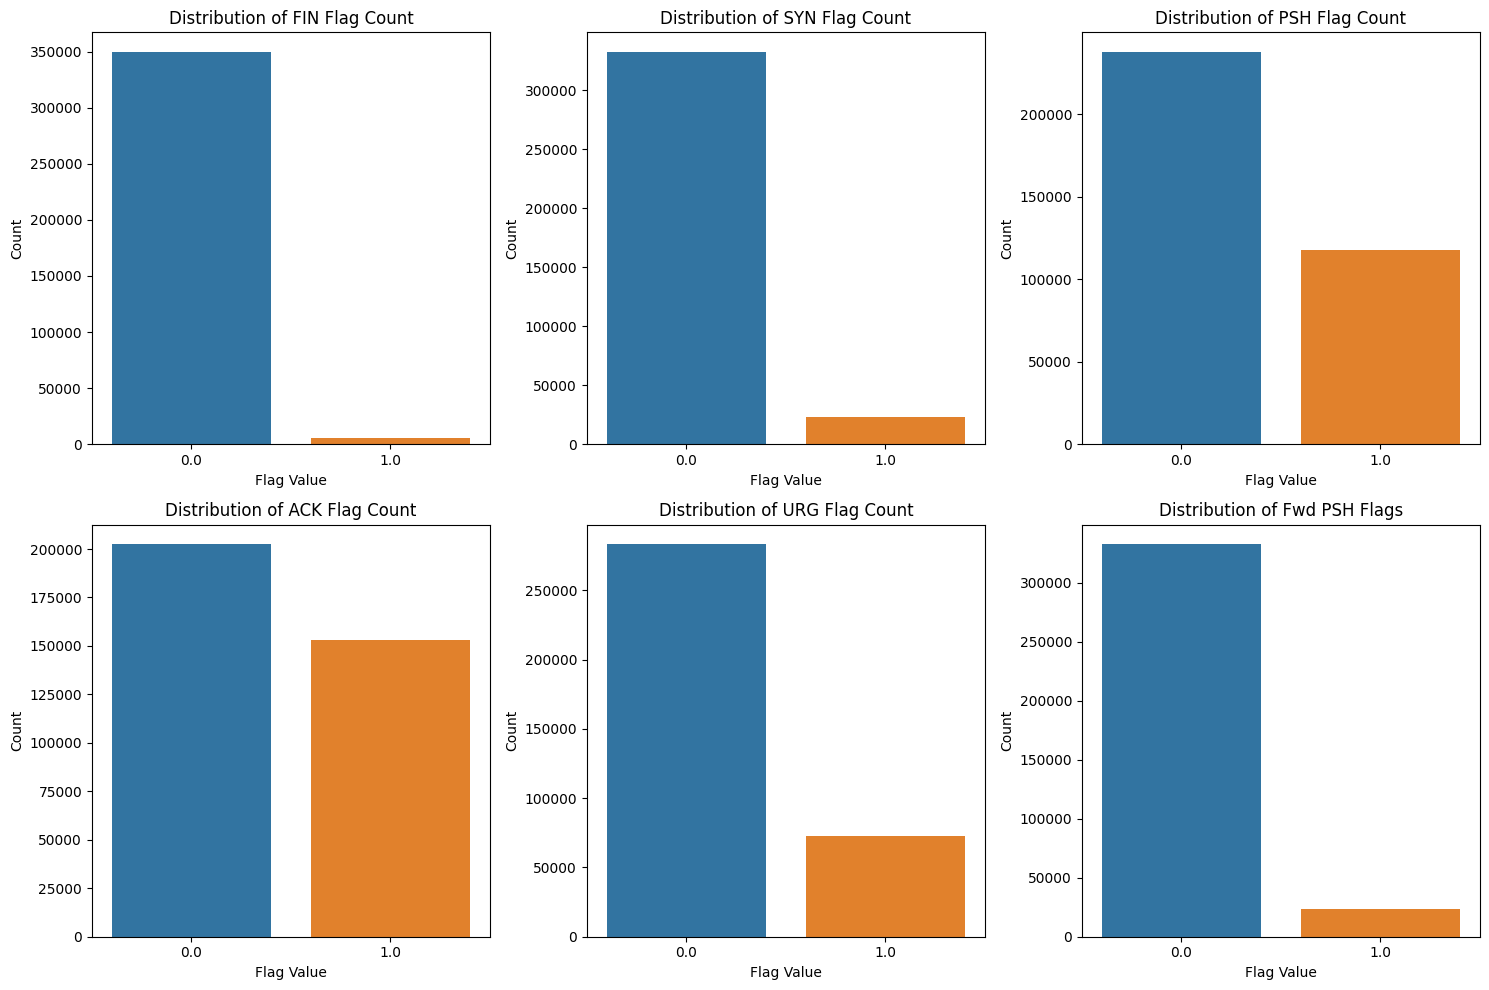

FIN Flag Count:
  0.0: 349698
  1.0: 5928

SYN Flag Count:
  0.0: 332353
  1.0: 23273

PSH Flag Count:
  0.0: 237794
  1.0: 117832

ACK Flag Count:
  0.0: 202364
  1.0: 153262

URG Flag Count:
  0.0: 283035
  1.0: 72591

Fwd PSH Flags:
  0.0: 332353
  1.0: 23273



In [134]:
# Countplot for each flag
plt.figure(figsize=(15, 10)) 

for i, flag in enumerate(flag_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=flag, data=df)
    plt.title(f'Distribution of {flag}')
    plt.xlabel('Flag Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

for column in flag_columns:
    value_counts = df[column].value_counts()
    print(f'{column}:')
    for flag, count in value_counts.items():
        print(f'  {flag}: {count}')
    print()

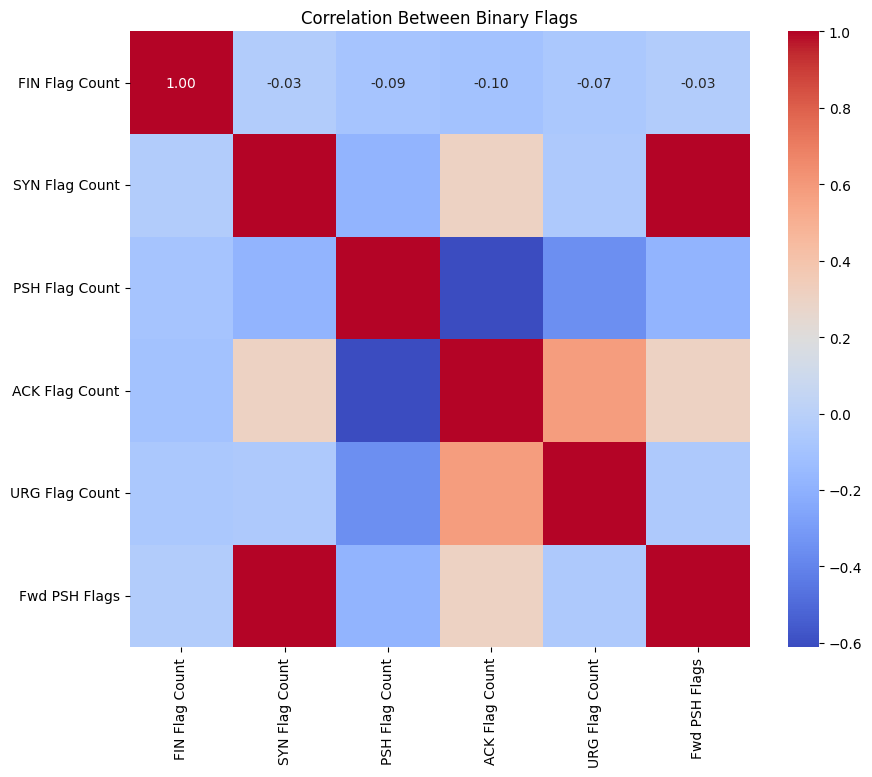

Correlation between FIN Flag Count and SYN Flag Count: -0.03
Correlation between FIN Flag Count and PSH Flag Count: -0.09
Correlation between FIN Flag Count and ACK Flag Count: -0.10
Correlation between FIN Flag Count and URG Flag Count: -0.07
Correlation between FIN Flag Count and Fwd PSH Flags: -0.03
Correlation between SYN Flag Count and PSH Flag Count: -0.19
Correlation between SYN Flag Count and ACK Flag Count: 0.30
Correlation between SYN Flag Count and URG Flag Count: -0.05
Correlation between SYN Flag Count and Fwd PSH Flags: 1.00
Correlation between PSH Flag Count and ACK Flag Count: -0.61
Correlation between PSH Flag Count and URG Flag Count: -0.36
Correlation between PSH Flag Count and Fwd PSH Flags: -0.19
Correlation between ACK Flag Count and URG Flag Count: 0.58
Correlation between ACK Flag Count and Fwd PSH Flags: 0.30
Correlation between URG Flag Count and Fwd PSH Flags: -0.05


In [135]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(flag_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Binary Flags')
plt.show()

correlation_matrix = flag_df.corr()
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        flag1, flag2 = flag_columns[i], flag_columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        print(f'Correlation between {flag1} and {flag2}: {correlation_value:.2f}')

The correlation analysis shows correlation values spanning from -0.61 to 0.58. Notably, the most prominent negative correlation emerges between 'PSH Flag Count' and 'ACK Flag Count' at -0.61, suggesting an inverse relationship between the Push (PSH) and Acknowledgment (ACK) flags. This could imply that in instances where data is pushed urgently (PSH), there may be fewer acknowledgments (ACK), or vice versa. In contrast, the most substantial positive correlation is found between 'ACK Flag Count' and 'URG Flag Count' at 0.58, indicating a positive association between Acknowledgment (ACK) and Urgent (URG) flags. While some correlations exhibit noticeable strength, the majority are relatively low in magnitude, hovering close to zero. This suggests that, overall, there are weak linear relationships between these binary flags.

## Categorical Analysis

In [136]:
category_columns = ['Label', 'Protocol']
category_df = df[category_columns]

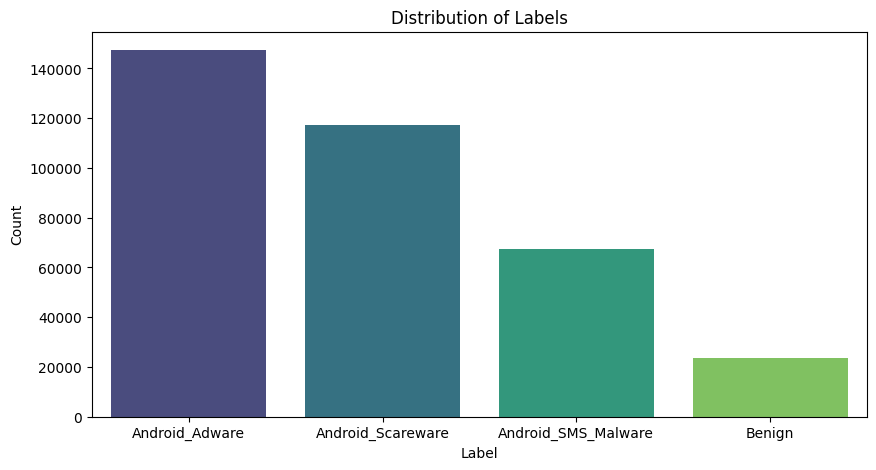

Android_Adware: 147443
Android_Scareware: 117081
Android_SMS_Malware: 67394
Benign: 23708


In [137]:
# Label
plt.figure(figsize=(10, 5))
sns.countplot(x='Label', data=category_df, palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

label_counts = category_df['Label'].value_counts()
for label, count in label_counts.items():
    print(f'{label}: {count}')

The Android Adware category appears most frequently in the dataset, indicating a significant presence of adware instances associated with Android devices. 708 - The "Benign" category has a relatively lower count compared to the malware categories, indicating instances considered harmless or normal in the network tr This data set contains an overwhelming amount of data on malicious apps.affic.

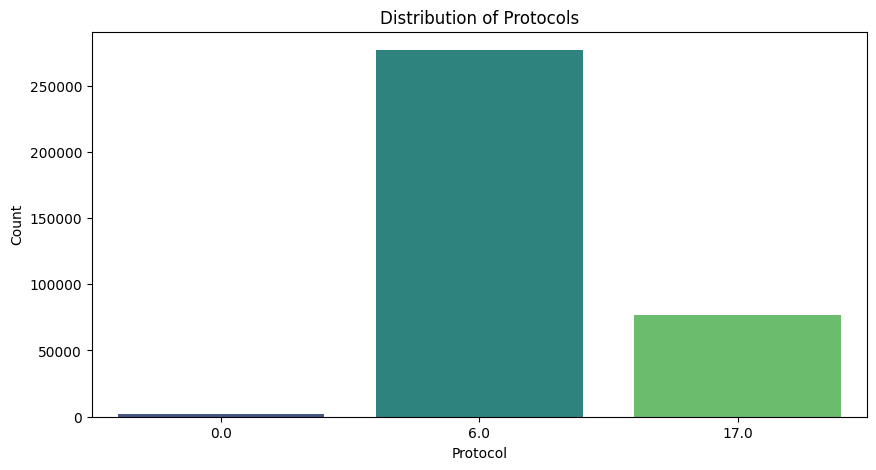

6.0: 276763
17.0: 76687
0.0: 2176


In [138]:
# Protocol
plt.figure(figsize=(10, 5))
sns.countplot(x='Protocol', data=category_df, palette='viridis')
plt.title('Distribution of Protocols')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

label_counts = category_df['Protocol'].value_counts()
for label, count in label_counts.items():
    print(f'{label}: {count}')


The high count of Protocol 6.0 (TCP) suggests widespread use of the reliable and connection-oriented Transmission Control Protocol. This indicates a significant presence of TCP-based network activities.

While Protocol 17.0 (UDP) has a lower count compared to TCP, its presence suggests the occurrence of faster, connectionless User Datagram Protocol communication, often used in real-time scenarios.

Instances categorized under Protocol 0.0 need closer scrutiny as it is not a standard protocol, possibly indicating undefined or unspecified protocols. Investigating these cases is essential to understand their nature and potential implications.

In [139]:
protocol_0_cases = df[df['Protocol'] == 0.0]
print(protocol_0_cases.head())

                   Flow ID Source IP  Source Port Destination IP  \
28   8.0.6.4-8.6.0.1-0-0-0   8.6.0.1            0        8.0.6.4   
145  8.0.6.4-8.6.0.1-0-0-0   8.6.0.1            0        8.0.6.4   
304  8.0.6.4-8.6.0.1-0-0-0   8.6.0.1            0        8.0.6.4   
321  8.0.6.4-8.6.0.1-0-0-0   8.6.0.1            0        8.0.6.4   
431  8.0.6.4-8.6.0.1-0-0-0   8.6.0.1            0        8.0.6.4   

     Destination Port  Protocol            Timestamp  Flow Duration  \
28                0.0       0.0  2017-06-13 11:52:53       96052881   
145               0.0       0.0  2017-06-13 11:55:13       88063847   
304               0.0       0.0  2017-06-13 11:57:28       90109841   
321               0.0       0.0  2017-06-13 11:59:45       97079697   
431               0.0       0.0  2017-06-13 12:02:16       93854147   

     Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
28                   3                       0                          0.0   
145   

Removing instances with Protocol 0.0 is advisable to maintain data consistency and reliability. Since Protocol 0.0 is not a standard or defined protocol, these cases might introduce noise or uncertainty into the analysis. Excluding them helps ensure a cleaner dataset, improving the overall quality of the data for more accurate and meaningful insights.

In [140]:
df = df[df['Protocol'] != 0.0]

## Source and Destination IP analysis

In [141]:
ip_columns = ['Source IP', 'Destination IP']
ip_df = df[ip_columns]

In [142]:
top_n = 15
top_source_ips = ip_df['Source IP'].value_counts().nlargest(top_n)
top_destination_ips = ip_df['Destination IP'].value_counts().nlargest(top_n)

print(f"Top {top_n} Source IPs:")
print(top_source_ips)
print(f"\nTop {top_n} Destination IPs:")
print(top_destination_ips)

Top 15 Source IPs:
Source IP
10.42.0.211        178751
10.42.0.151        120170
10.42.0.42          17957
10.42.0.1            1768
202.77.129.150        947
119.146.74.48         884
192.229.173.173       396
64.71.142.124         385
180.149.138.210       380
203.205.147.229       379
104.192.108.27        376
123.125.29.138        300
119.146.74.34         299
104.192.110.245       294
180.163.255.159       264
Name: count, dtype: int64

Top 15 Destination IPs:
Destination IP
10.42.0.1          67213
10.42.0.211        19934
10.42.0.151        13069
119.146.74.48       6312
183.232.231.172     6067
192.229.173.173     5193
180.149.136.194     4638
115.239.210.141     4102
106.39.169.66       3325
137.175.31.97       3065
123.125.115.164     2979
106.39.162.36       2755
202.77.129.150      2681
219.142.78.162      2499
119.146.74.33       2270
Name: count, dtype: int64


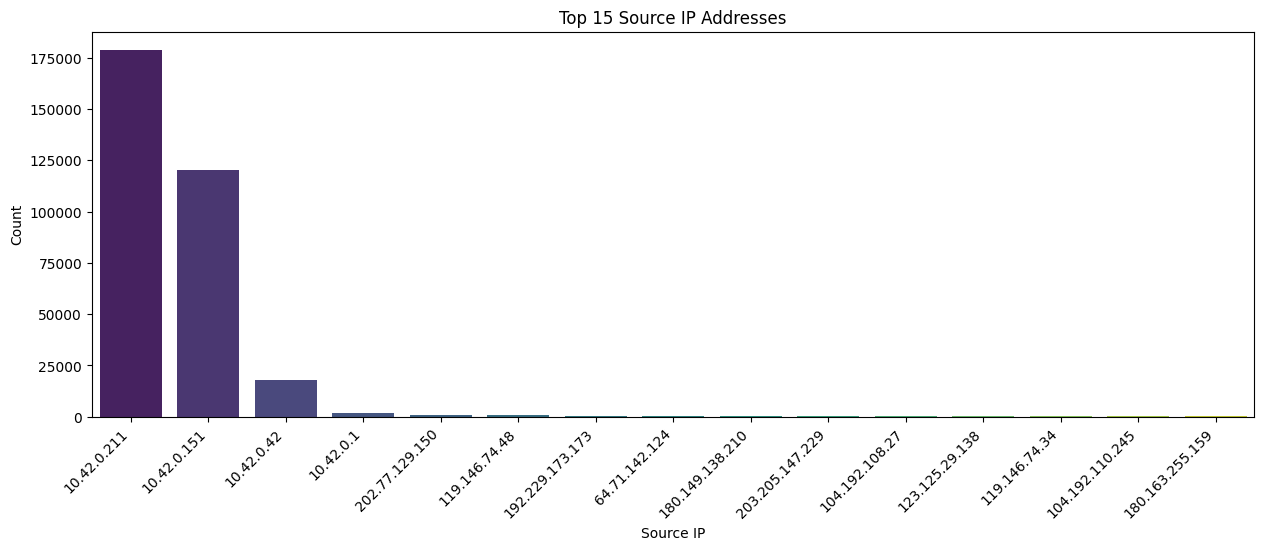

In [143]:
# Countplot for top N Source IPs
plt.figure(figsize=(15, 5))
sns.countplot(x='Source IP', data=ip_df[ip_df['Source IP'].isin(top_source_ips.index)], palette='viridis', order=top_source_ips.index)
plt.title(f'Top {top_n} Source IP Addresses')
plt.xlabel('Source IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

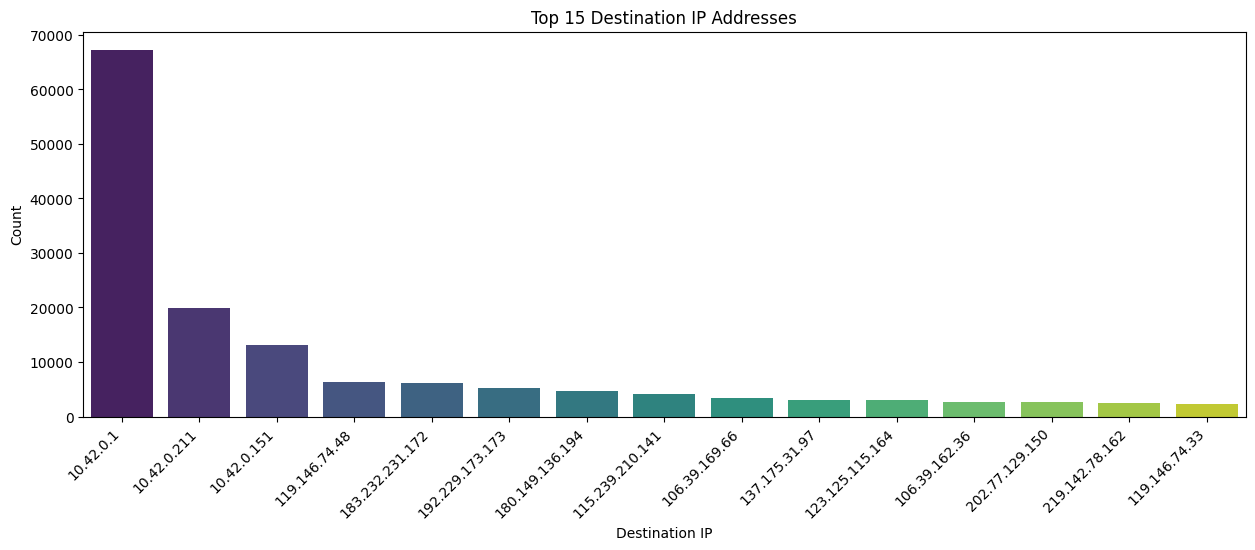

In [144]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Destination IP', data=ip_df[ip_df['Destination IP'].isin(top_destination_ips.index)], palette='viridis', order=top_destination_ips.index)
plt.title(f'Top {top_n} Destination IP Addresses')
plt.xlabel('Destination IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The top Source IPs indicate that certain IP addresses, such as 10.42.0.211 and 10.42.0.151, are significantly more prevalent in the dataset. These IPs may correspond to the most active sources of network traffic associated with Android malware.

Similarly, the top Destination IPs, particularly 10.42.0.1, 10.42.0.211, and 10.42.0.151, suggest frequent communication destinations within the network. Unusual or suspicious patterns in these IP addresses could potentially be indicative of fraudulent or malicious activities.

## Packet analysis

In [145]:
packet_columns = [
    'Total Fwd Packets', 'Total Backward Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std',
    'Fwd Packets/s', 'Bwd Packets/s',
    'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
    'Average Packet Size',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size'
]

packet_df = df[packet_columns]

In [146]:
packet_df.describe()

,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Total Length of Fwd Packets,Total Length of Bwd Packets,Avg Fwd Segment Size,Avg Bwd Segment Size
count,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,3.534500e+05,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,353450.000000,3.534500e+05,3.534500e+05,353450.000000,353450.000000
mean,7.374480,10.559196,213.306703,12.597363,60.011314,80.015914,322.379550,23.199655,169.574840,124.241632,4.712724e+03,819.718634,8.465543,376.923126,115.867915,145.788986,71924.821075,128.217943,6.833811e+02,1.136374e+04,60.011314,169.574840
std,67.207507,192.266380,367.686227,58.467454,119.584137,154.576320,541.250714,59.161942,312.008244,230.168359,3.636611e+04,8616.427866,21.376561,564.881728,194.352229,225.101168,137528.870906,200.345273,1.947825e+04,2.772361e+05,119.584137,312.008244
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.255488e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.000000,1.000000,31.000000,0.000000,29.000000,0.000000,31.000000,0.000000,15.500000,0.000000,4.017115e+00,0.937564,0.000000,46.000000,36.000000,15.500000,240.250000,51.428571,3.100000e+01,3.100000e+01,29.000000,15.500000
75%,5.000000,4.000000,353.000000,18.000000,55.000000,101.663742,241.000000,0.000000,152.250000,104.500000,3.208862e+01,17.342628,0.000000,562.000000,126.567460,222.405036,49464.000000,157.500000,4.410000e+02,3.130000e+02,55.000000,152.250000
max,17877.000000,55652.000000,1460.000000,1460.000000,1460.000000,1032.375901,1460.000000,1460.000000,1460.000000,1002.677416,2.000000e+06,500000.000000,1208.000000,1460.000000,1373.111111,842.931393,710533.333333,1812.000000,9.043781e+06,8.050972e+07,1460.000000,1460.000000



The total count of both forward and backward packets per flow shows notable variability, indicating diverse patterns in data transmission.

An analysis of packet length statistics, encompassing maximum, minimum, mean, and standard deviation, reveals a broad distribution of values. Mean values offer insights into average packet lengths, while standard deviations highlight the extent of dispersion around these averages.

Packet rates, measured in packets per second for both forward and backward directions, display significant variation across flows. Some exhibit minimal or zero packet rates, while others demonstrate higher rates, contributing to the overall diversity in the dataset.

The average packet size, averaging 128.22 bytes, further emphasizes the dataset's variability in packet characteristics.c.







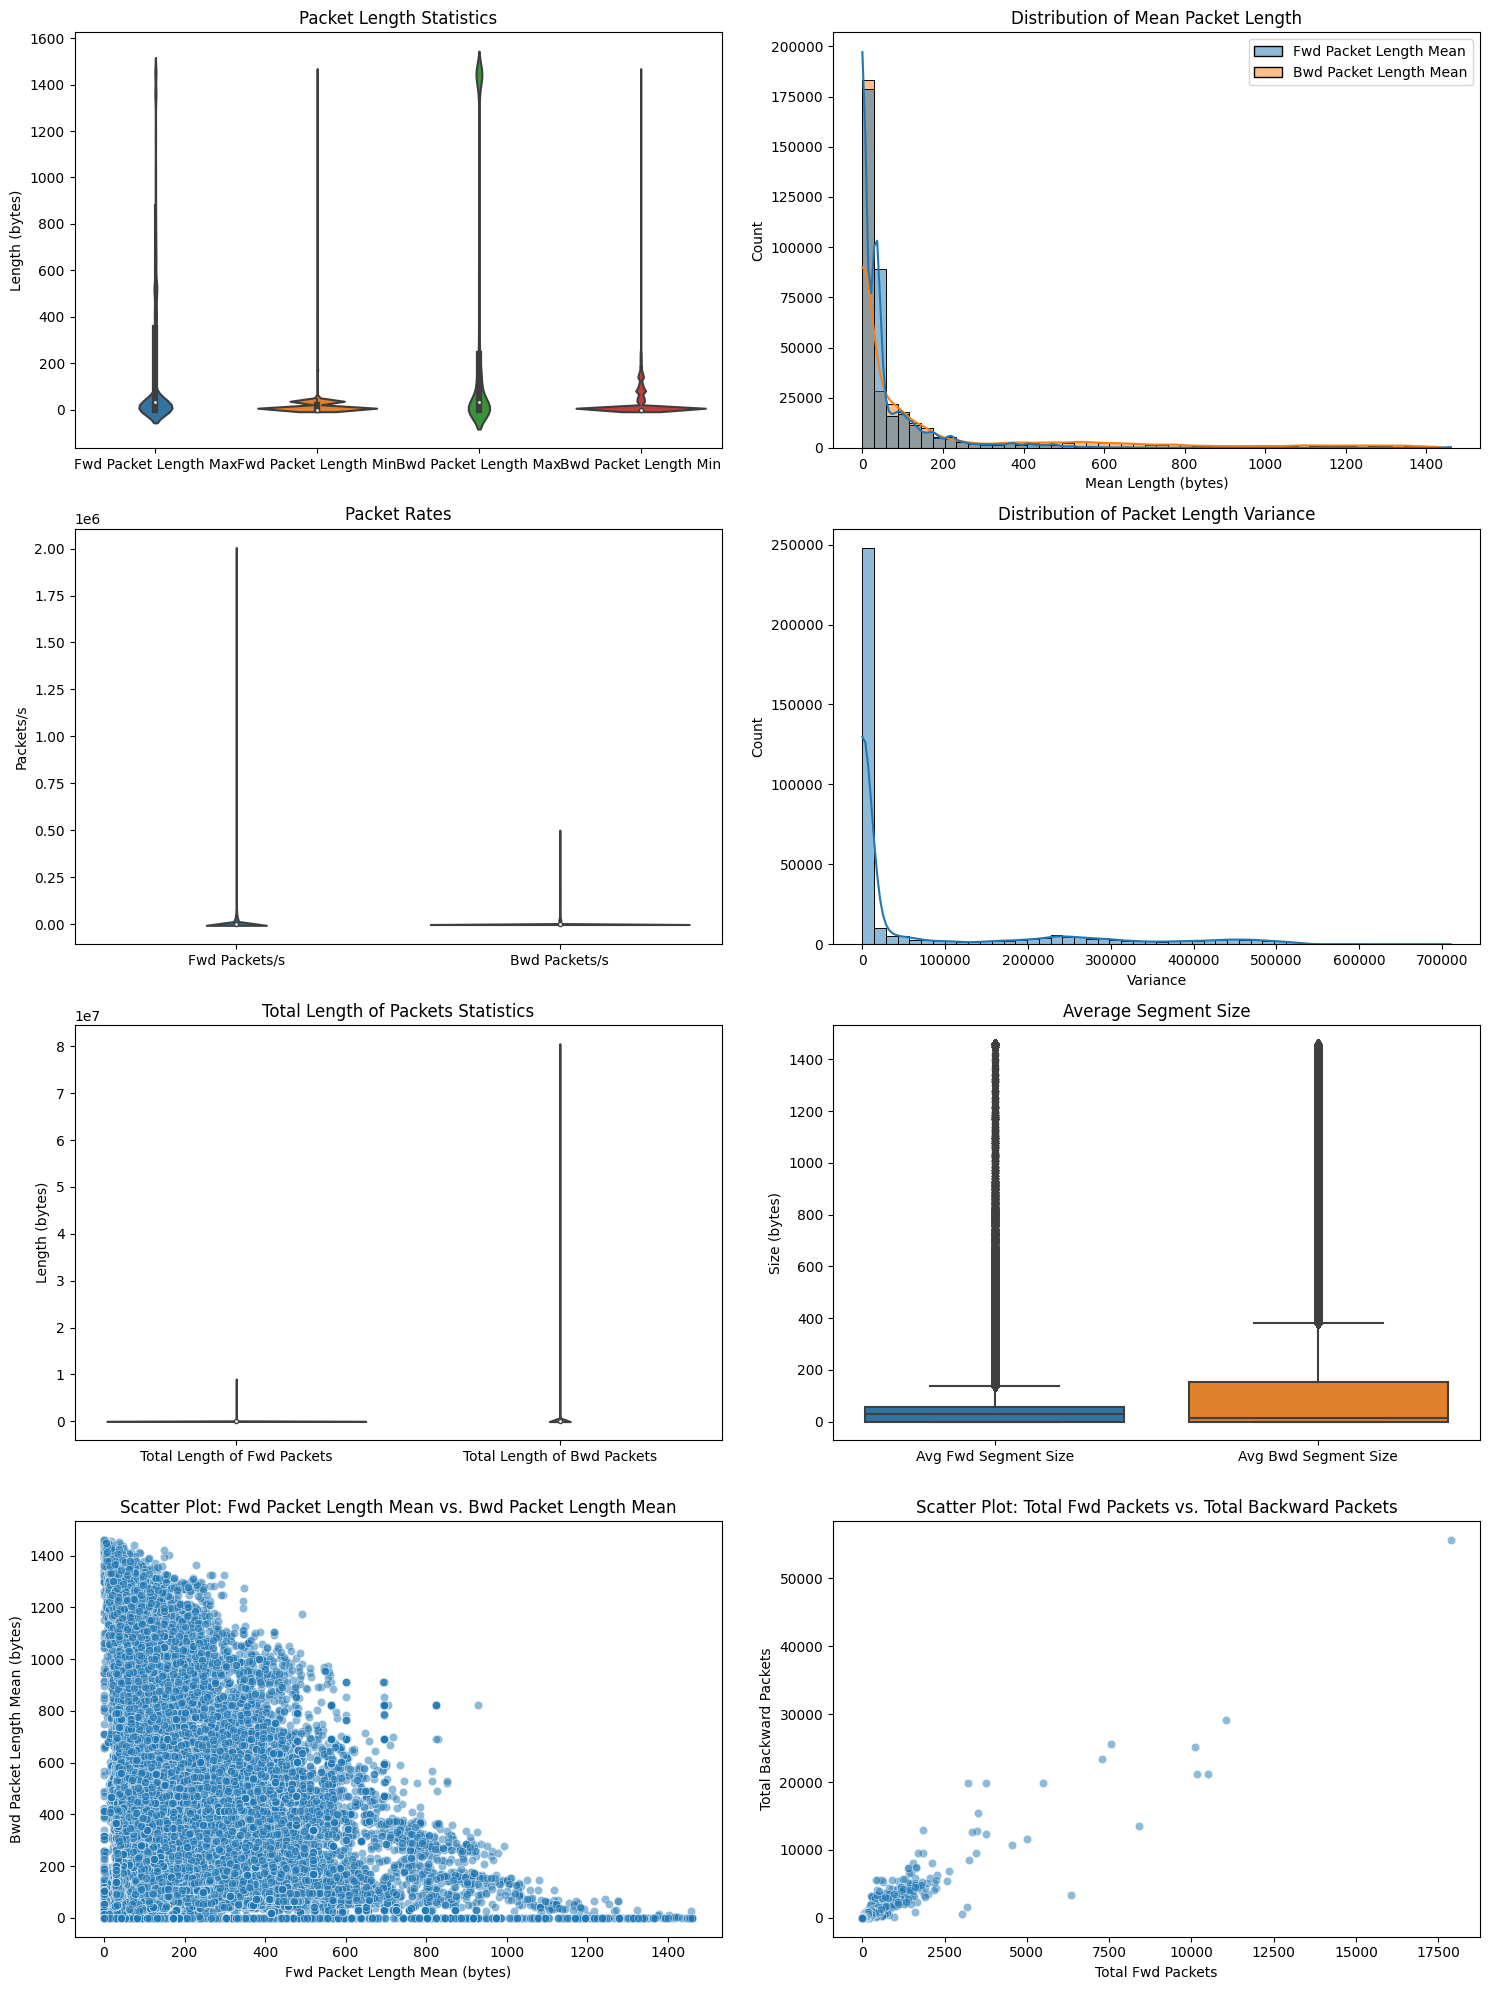

In [147]:
# Plotting
plt.figure(figsize=(15, 20))

# Violin plot for packet length statistics
plt.subplot(4, 2, 1)
sns.violinplot(data=packet_df[['Fwd Packet Length Max', 'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Bwd Packet Length Min']])
plt.title('Packet Length Statistics')
plt.ylabel('Length (bytes)')

# Distribution of packet lengths
plt.subplot(4, 2, 2)
sns.histplot(data=packet_df[['Fwd Packet Length Mean', 'Bwd Packet Length Mean']], bins=50, kde=True)
plt.title('Distribution of Mean Packet Length')
plt.xlabel('Mean Length (bytes)')

# Violin plot for packet rates
plt.subplot(4, 2, 3)
sns.violinplot(data=packet_df[['Fwd Packets/s', 'Bwd Packets/s']])
plt.title('Packet Rates')
plt.ylabel('Packets/s')

# Distribution of packet length variance
plt.subplot(4, 2, 4)
sns.histplot(data=packet_df['Packet Length Variance'], bins=50, kde=True)
plt.title('Distribution of Packet Length Variance')
plt.xlabel('Variance')

# Additional violin plot for packet length statistics
plt.subplot(4, 2, 5)
sns.violinplot(data=packet_df[['Total Length of Fwd Packets', 'Total Length of Bwd Packets']])
plt.title('Total Length of Packets Statistics')
plt.ylabel('Length (bytes)')

# Average segment size
plt.subplot(4, 2, 6)
sns.boxplot(data=packet_df[['Avg Fwd Segment Size', 'Avg Bwd Segment Size']])
plt.title('Average Segment Size')
plt.ylabel('Size (bytes)')

# Scatter plot for relationship between Fwd Packet Length Mean and Bwd Packet Length Mean
plt.subplot(4, 2, 7)
sns.scatterplot(data=packet_df, x='Fwd Packet Length Mean', y='Bwd Packet Length Mean', alpha=0.5)
plt.title('Scatter Plot: Fwd Packet Length Mean vs. Bwd Packet Length Mean')
plt.xlabel('Fwd Packet Length Mean (bytes)')
plt.ylabel('Bwd Packet Length Mean (bytes)')

# Additional scatter plot for relationship between Total Fwd Packets and Total Backward Packets
plt.subplot(4, 2, 8)
sns.scatterplot(data=packet_df, x='Total Fwd Packets', y='Total Backward Packets', alpha=0.5)
plt.title('Scatter Plot: Total Fwd Packets vs. Total Backward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')

plt.tight_layout()
plt.show()


The packet length statistics reveal wide variability, with some packets reaching the maximum length of 1460 bytes. Mean lengths for both forward and backward packets display diversity, and packet rates indicate varying levels of activity. Packet length variance is considerable, with a mix of constant and variable-length packets.

Total length statistics show significant variation, with potential data transfer asymmetry. Average segment sizes align with mean packet lengths, indicating payload presence. Scatter plots suggest weak to strong correlations between certain packet attribut.s.

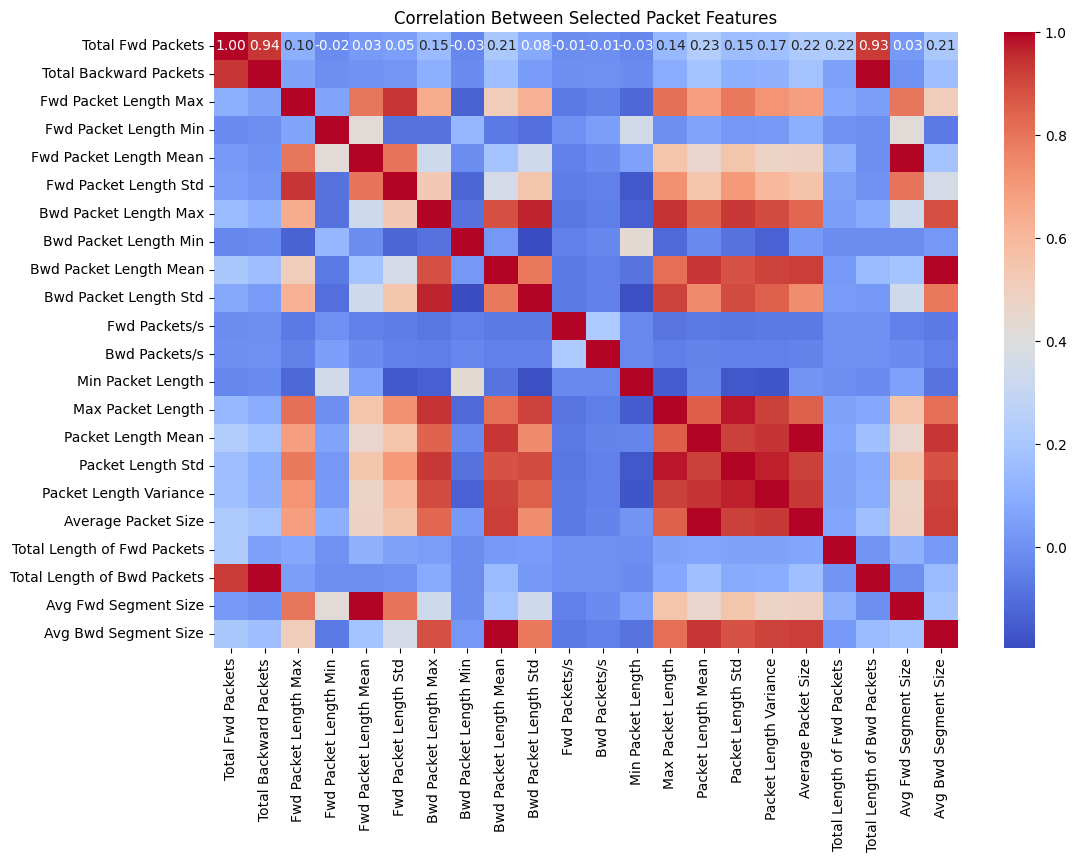

In [148]:
# Calculate correlation matrix
correlation_matrix = packet_df.corr()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Selected Packet Features')
plt.show()

The correlation matrix highlights strong positive correlations between "Total Fwd Packets" and "Total Backward Packets" (0.94) and between "Total Length of Fwd Packets" and "Total Length of Bwd Packets" (0.93). Notably, several packet length attributes exhibit significant correlations, such as "Fwd Packet Length Max" and "Max Packet Length" (0.81), and "Fwd Packet Length Mean" and "Packet Length Mean" (0.80).

Additionally, attributes related to packet sizes, including "Average Packet Size" and various length metrics, demonstrate strong positive correlations, with values ranging from 0.73 to 0.99. These correlations suggest that variations in packet sizes tend to occur consistently across different metrics.

Furthermore, "Avg Fwd Segment Size" and "Avg Bwd Segment Size" show a strong positive correlation of 0.80, indicating similarity in average segment sizes for forward and backward packets.ket size.

These observed correlations provide valuable insights into the interdependencies among different packet features, contributing to a more comprehensive understanding of the underlying patterns in the dataset.

## Temporal Analysis

In [149]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

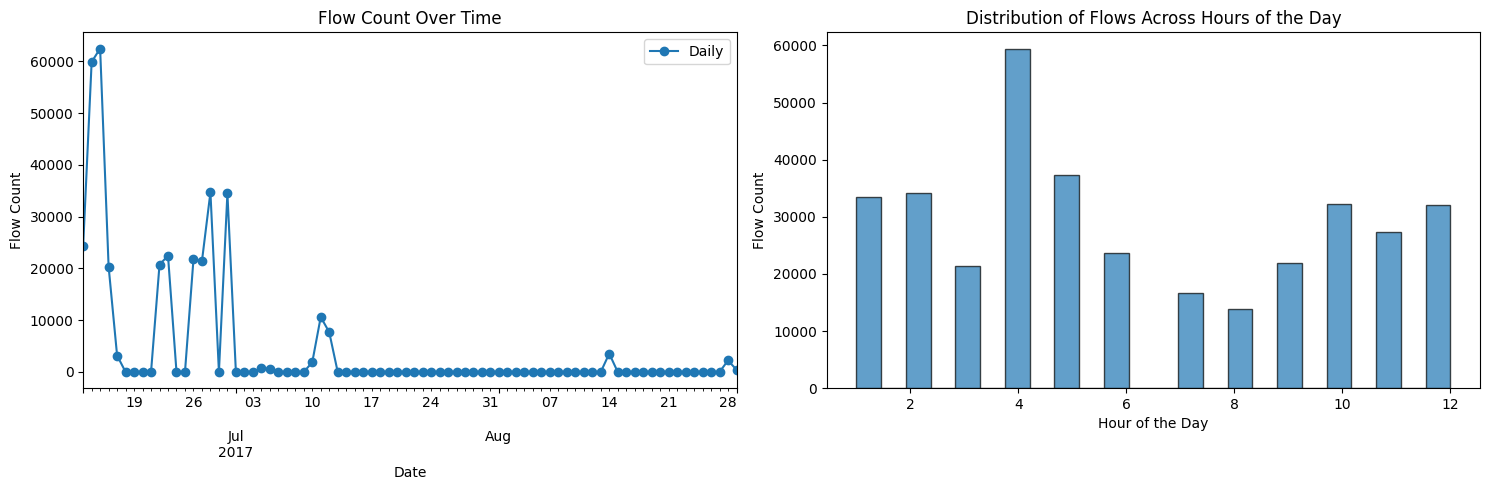

Daily Flow Count Trends:
Timestamp
2017-06-13    24311
2017-06-14    59897
2017-06-15    62499
2017-06-16    20357
2017-06-17     3176
              ...  
2017-08-25        0
2017-08-26        0
2017-08-27        0
2017-08-28     2226
2017-08-29      419
Freq: D, Length: 78, dtype: int64

Distribution of Flows Across Hours of the Day:
Hour
1     33400
2     34241
3     21471
4     59334
5     37350
6     23655
7     16624
8     13844
9     21984
10    32158
11    27350
12    32039
Name: count, dtype: int64


In [150]:
# Plotting
plt.figure(figsize=(15, 5))

# Line plot for the count of flows over time
plt.subplot(1, 2, 1)
df.resample('D', on='Timestamp').size().plot(label='Daily', marker='o')
plt.title('Flow Count Over Time')
plt.xlabel('Date')
plt.ylabel('Flow Count')
plt.legend()

# Histogram of flows per hour of the day
plt.subplot(1, 2, 2)
df['Hour'] = df['Timestamp'].dt.hour
plt.hist(df['Hour'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Distribution of Flows Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Flow Count')

plt.tight_layout()
plt.show()

# Count trends over time
daily_count = df.resample('D', on='Timestamp').size()
print("Daily Flow Count Trends:")
print(daily_count)

# Distribution of flows across hours
hourly_count = df['Hour'].value_counts().sort_index()
print("\nDistribution of Flows Across Hours of the Day:")
print(hourly_count)

In [151]:
print(f"Number of days with no flow: {df.resample('D', on='Timestamp').size().eq(0).sum()}")

Number of days with no flow: 59


The daily flow count exhibits dynamic trends over the observed period. Notably, there is a substantial increase from June 13, 2017, to June 15, 2017, with the highest flow count recorded on June 14, 2017 (59,897 flows). Following this peak, the count experiences a noticeable decline, reaching a minimum on August 18, 2017. Toward the end of the dataset, there is a slight resurgence in flow count on August 28, 2017 (2,226 flows), and a smaller count on August 29, 2017 (419 flows).

Regarding the distribution of flows across hours of the day, several noteworthy patterns emerge. The early morning hours, particularly from 4 AM to 6 AM, show elevated flow counts, reaching a peak at 4 AM (59,334 flows). Conversely, the period from 7 AM to 9 AM exhibits a decrease in flow counts. The distribution reflects variations in network activity, possibly influenced by regional or organizational working hours and internet usage patterns.

In [152]:
df.drop('Hour', axis=1, inplace=True)

## IAT

IAT stands for Inter-Arrival Time, which measures the time intervals between consecutive events or occurrences. In the context of network traffic or flow data, IAT typically refers to the time between the arrivals of successive packets or flows. 

In [153]:
# IAT columns
iat_columns = [
    'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min'
]

iat_df = df[iat_columns]

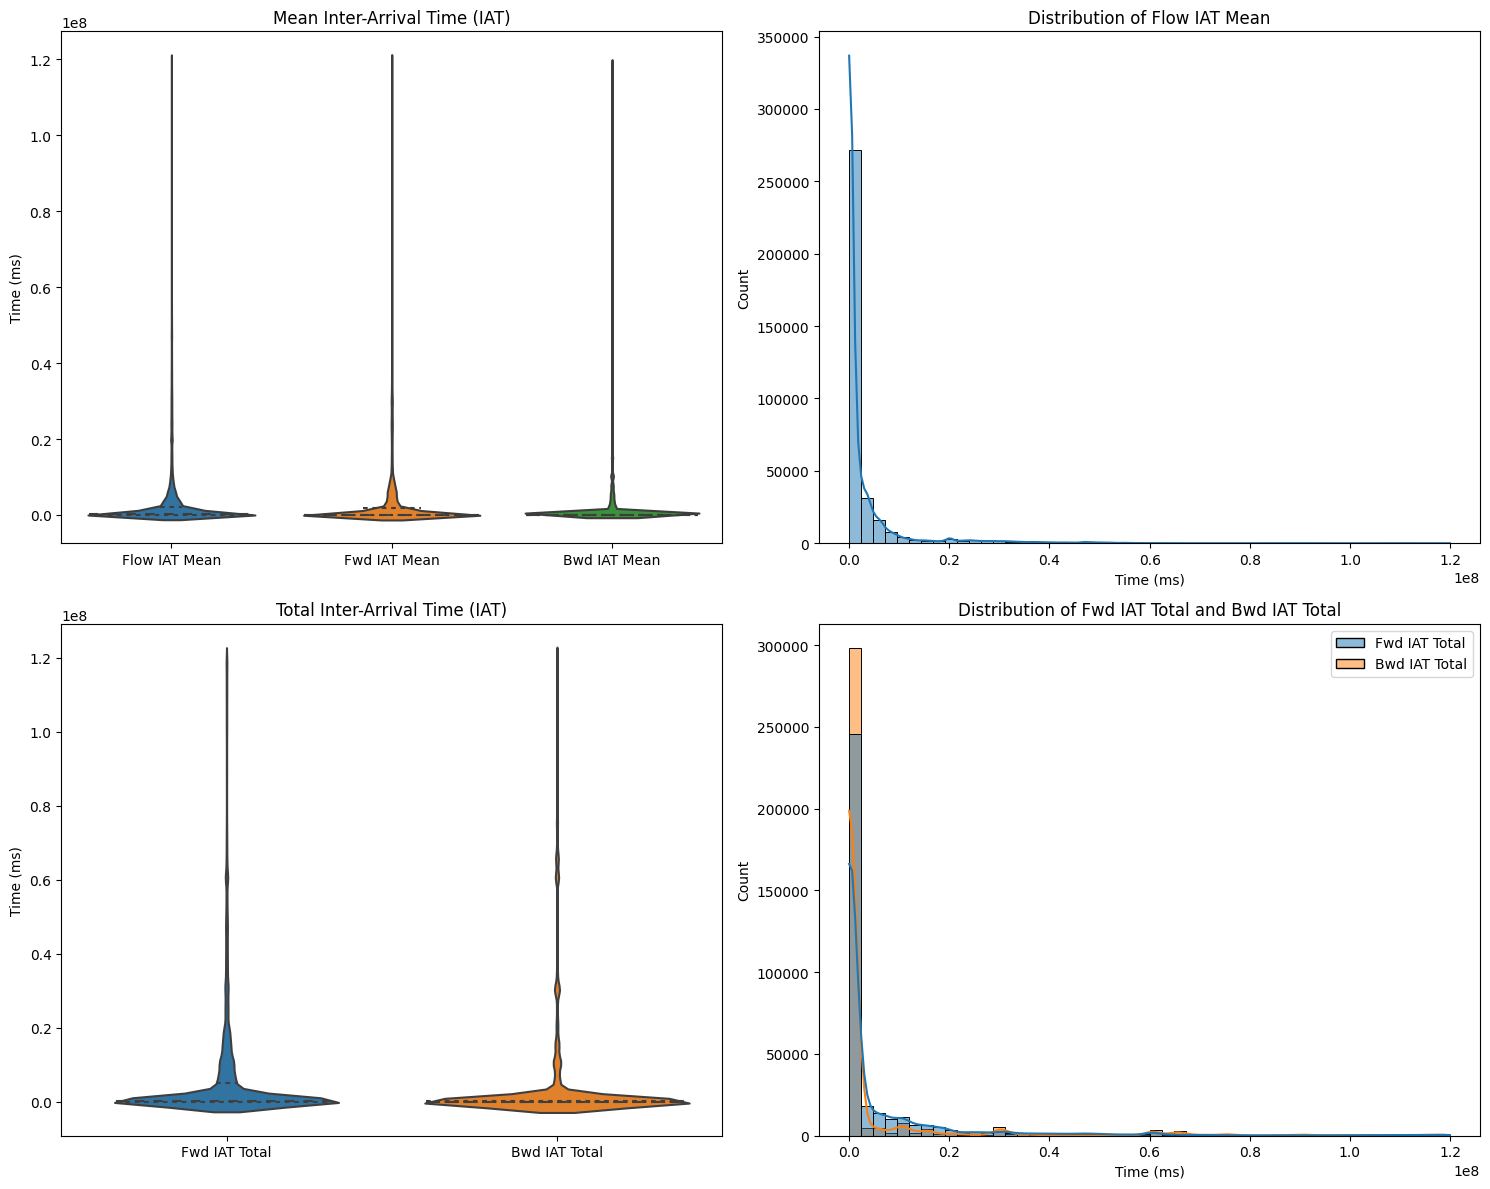

In [154]:
# Plotting
plt.figure(figsize=(15, 12))

# Violin plot for Mean Inter-Arrival Time (IAT)
plt.subplot(2, 2, 1)
sns.violinplot(data=iat_df[['Flow IAT Mean', 'Fwd IAT Mean', 'Bwd IAT Mean']], inner='quartile')
plt.title('Mean Inter-Arrival Time (IAT)')
plt.ylabel('Time (ms)')

# Distribution of Flow IAT Mean
plt.subplot(2, 2, 2)
sns.histplot(iat_df['Flow IAT Mean'], bins=50, kde=True)
plt.title('Distribution of Flow IAT Mean')
plt.xlabel('Time (ms)')

# Violin plot for Total Inter-Arrival Time (IAT)
plt.subplot(2, 2, 3)
sns.violinplot(data=iat_df[['Fwd IAT Total', 'Bwd IAT Total']], inner='quartile')
plt.title('Total Inter-Arrival Time (IAT)')
plt.ylabel('Time (ms)')

# Distribution of Fwd IAT Total and Bwd IAT Total
plt.subplot(2, 2, 4)
sns.histplot(iat_df[['Fwd IAT Total', 'Bwd IAT Total']], bins=50, kde=True)
plt.title('Distribution of Fwd IAT Total and Bwd IAT Total')
plt.xlabel('Time (ms)')

plt.tight_layout()
plt.show()


The mean inter-arrival time (IAT) for flows exhibits wide variation, with potential instances of negative or zero values. The distributions of Flow IAT Mean, Fwd IAT Total, and Bwd IAT Total are all right-skewed, indicating a concentration of lower values with extended tails of higher values. High skewness and kurtosis values suggest the presence of outliers and extreme values in these distributions. Further exploration is needed to understand the characteristics of extreme inter-arrival times and address potential data quality issues.

## Header Lenght

In [155]:
# Selecting relevant columns for header length EDA
header_length_columns = ['Fwd Header Length', 'Bwd Header Length']

header_length_df = df[header_length_columns]

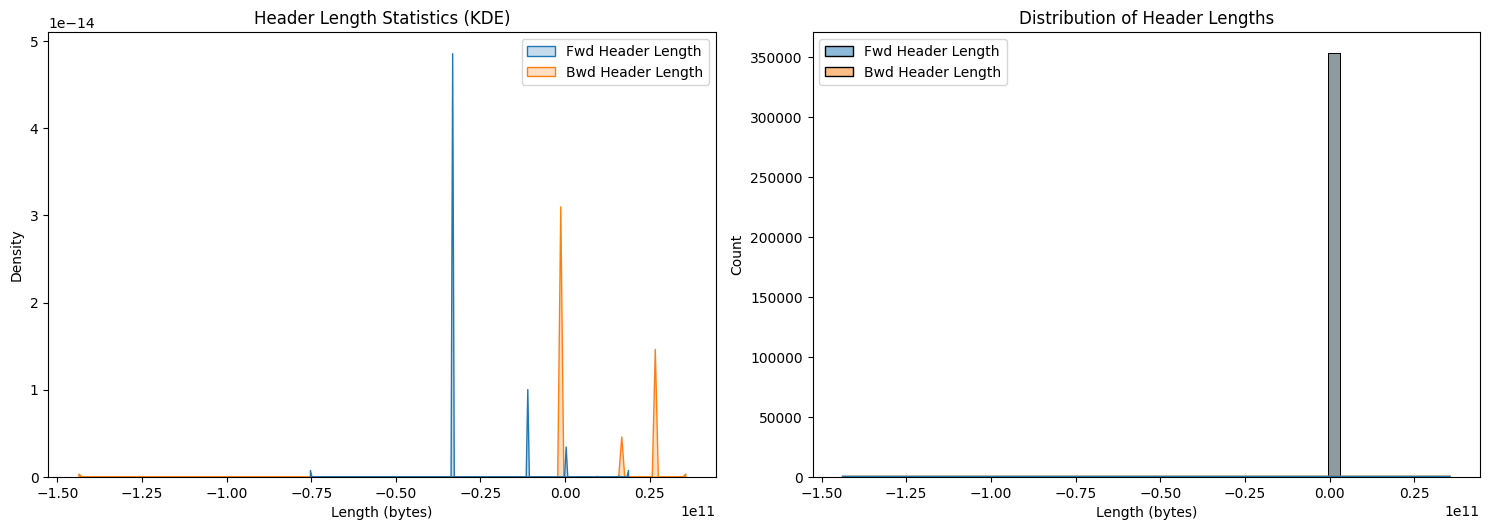

Header Length Statistics:
                           mean           std           min   25%   50%  \
Fwd Header Length -7.648141e+05  2.096892e+08 -7.533332e+10  32.0  64.0   
Bwd Header Length -1.590608e+06  4.399158e+08 -1.436913e+11   0.0  32.0   

                     75%           max  
Fwd Header Length  136.0  1.858721e+10  
Bwd Header Length  112.0  3.546917e+10  


In [156]:
# Plotting
plt.figure(figsize=(15, 10))

# KDE plot for header length statistics
plt.subplot(2, 2, 1)
sns.kdeplot(data=header_length_df[['Fwd Header Length', 'Bwd Header Length']], fill=True, common_norm=False)
plt.title('Header Length Statistics (KDE)')
plt.xlabel('Length (bytes)')

# Distribution of header lengths
plt.subplot(2, 2, 2)
sns.histplot(data=header_length_df[['Fwd Header Length', 'Bwd Header Length']], bins=50, kde=True)
plt.title('Distribution of Header Lengths')
plt.xlabel('Length (bytes)')

plt.tight_layout()
plt.show()

print("Header Length Statistics:")
print(header_length_df.describe().transpose()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])


The header length statistics reveal significant variations and potential anomalies in both forward (Fwd) and backward (Bwd) header lengths. The mean values are negatively skewed, indicating the presence of outliers or extreme values. Standard deviations are notably high, underscoring the wide dispersion around the mean. Minimum values suggest the existence of negative or unusually low lengths. The quartiles provide insights into the central tendency, while maximum values indicate the presence of extremely high header lengths, potentially outliers or errors in the data. Overall, the header length distributions exhibit complexity and potential data quality issues.

In [157]:
# Count of rows with negative Fwd Header Length
count_negative_fwd_header_length = negative_fwd_header_length_rows_df.shape[0]
print(f"Count of rows with negative Fwd Header Length: {count_negative_fwd_header_length}")

# Count of rows with negative Bwd Header Length
count_negative_bwd_header_length = negative_bwd_header_length_rows_df.shape[0]
print(f"Count of rows with negative Bwd Header Length: {count_negative_bwd_header_length}")

# Count of rows with both negative Fwd and Bwd Header Length
count_both_negative = both_negative_rows_df.shape[0]
print(f"Count of rows with both negative Fwd and Bwd Header Length: {count_both_negative}")

# Show rows with both negative Fwd and Bwd Header Length
print("\nRows with both negative Fwd and Bwd Header Length:")
print(both_negative_rows_df[['Fwd Header Length', 'Bwd Header Length']])


Count of rows with negative Fwd Header Length: 36
Count of rows with negative Bwd Header Length: 27
Count of rows with both negative Fwd and Bwd Header Length: 27

Rows with both negative Fwd and Bwd Header Length:
        Fwd Header Length  Bwd Header Length
26745                  -1                 -1
30346                  -1                 -1
58419        -11160500324       -19530875522
61421                  -1                 -1
62478                  -1                 -1
73182                  -1                 -1
74150                  -1                 -1
80319                  -1                 -1
80690                  -1                 -1
132524                 -1                 -1
159483       -54045781901      -105422636582
174904       -34876534949      -143691334339
233950                 -1                 -1
250377       -20684184491       -36697746119
250676       -33361587770       -59383625813
286053       -20684184491       -36697746119
286352       -333615

The negative header length will be removed to ensure data integrity, improve interpretability, enhance model performance, maintain consistency, and overall enhance the validity of the dataset. Negative values are likely errors that can distort analysis and hinder the accuracy of insights and machine learning models.

In [158]:
# Remove rows with negative Header Length
df = df[df['Fwd Header Length'] >= 0]
df = df[df['Bwd Header Length'] >= 0]

One common method to identify outliers is using the interquartile range (IQR). Outliers are often defined as values outside the range of \(Q1 - 1.5 \times IQR\) to \(Q3 + 1.5 \times IQR\), where \(Q1\) is the first quartile, \(Q3\) is the third quartile, and \(IQR\) is the interquartile range.


In [159]:
# Identify outliers for Fwd Header Length
q1_fwd = header_length_df['Fwd Header Length'].quantile(0.25)
q3_fwd = header_length_df['Fwd Header Length'].quantile(0.75)
iqr_fwd = q3_fwd - q1_fwd

outliers_fwd = ((header_length_df['Fwd Header Length'] < q1_fwd - 1.5 * iqr_fwd) | 
                (header_length_df['Fwd Header Length'] > q3_fwd + 1.5 * iqr_fwd))

# Identify outliers for Bwd Header Length
q1_bwd = header_length_df['Bwd Header Length'].quantile(0.25)
q3_bwd = header_length_df['Bwd Header Length'].quantile(0.75)
iqr_bwd = q3_bwd - q1_bwd

outliers_bwd = ((header_length_df['Bwd Header Length'] < q1_bwd - 1.5 * iqr_bwd) | 
                (header_length_df['Bwd Header Length'] > q3_bwd + 1.5 * iqr_bwd))

# Count and print outliers
count_outliers_fwd = outliers_fwd.sum()
count_outliers_bwd = outliers_bwd.sum()

print(f"Outliers in Fwd Header Length: {count_outliers_fwd}")
print(f"Outliers in Bwd Header Length: {count_outliers_bwd}")

# Print values of outliers
print("\nValues of Outliers in Fwd Header Length:")
print(header_length_df.loc[outliers_fwd, 'Fwd Header Length'])

print("\nValues of Outliers in Bwd Header Length:")
print(header_length_df.loc[outliers_bwd, 'Bwd Header Length'])

Outliers in Fwd Header Length: 50485
Outliers in Bwd Header Length: 45907

Values of Outliers in Fwd Header Length:
18         296
22        1352
24         680
30        1696
32         328
          ... 
355438     456
355439    1160
355440     520
355444     320
355494     660
Name: Fwd Header Length, Length: 50485, dtype: int64

Values of Outliers in Bwd Header Length:
18         296
22        3144
24         744
30        1440
32         328
          ... 
355435     296
355438     648
355439    1992
355440     456
355494     872
Name: Bwd Header Length, Length: 45907, dtype: int64


The analysis reveals that a substantial number of outliers exist in both Fwd Header Length (50,485 outliers) and Bwd Header Length (45,907 outliers). Outliers in Fwd Header Length range from 296 to 1,858,721, with varying values, while Bwd Header Length outliers span from 296 to 3,546,917. These outliers could potentially indicate anomalies, errors, or extreme values in the data distribution.

It is therefore important to note the presence of these outliers and it may be useful to keep in mind when building a model for this data, as it may be beneficial for the model to be robust to outliers. The outliers will not be removed since they may prove important for the identification of fraudulent apps. An extremely long header length may indicate a certain type of malware.

Lets modify the data visualisation with the knowledge of there being a lot of positive outliers in the dataset. This modification applies a log transformation to the data before plotting, addressing the issue of positive outliers and providing a clearer representation of the distribution. The "+1" in the log transformation is added to handle cases where the data contains zero values.

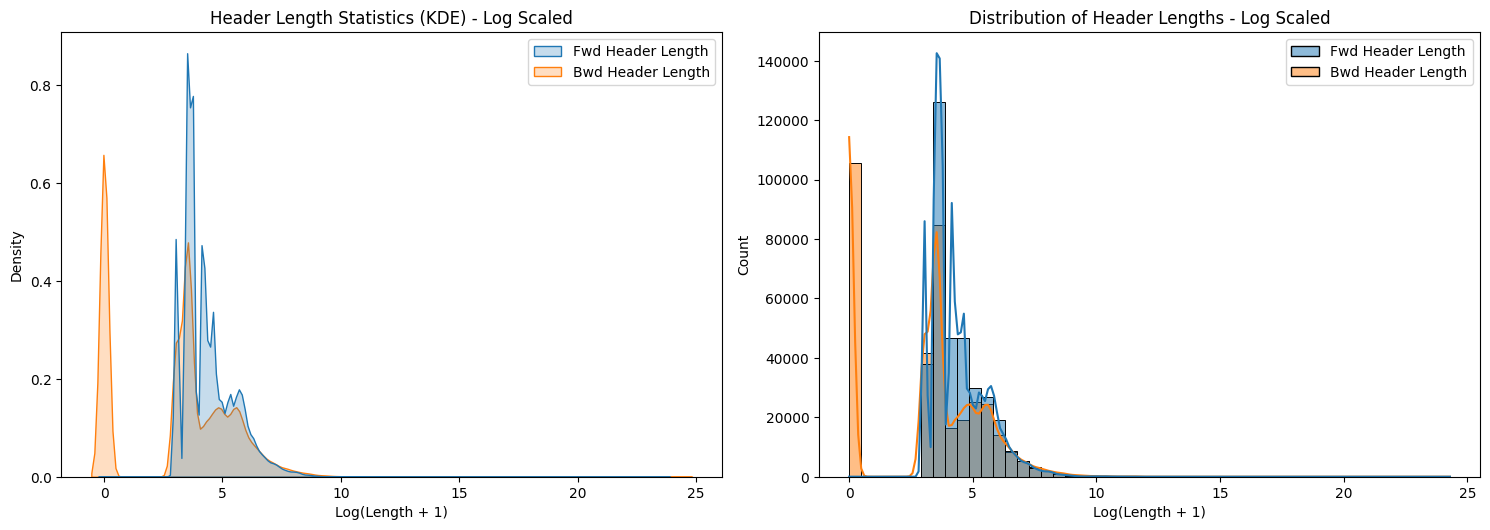

In [160]:
# Selecting relevant columns for header length EDA
header_length_columns = ['Fwd Header Length', 'Bwd Header Length']

header_length_df = df[header_length_columns]

# Plotting with logarithmic scale
plt.figure(figsize=(15, 10))

# Log-scaled KDE plot for header length statistics
plt.subplot(2, 2, 1)
sns.kdeplot(data=np.log1p(header_length_df[['Fwd Header Length', 'Bwd Header Length']]), fill=True, common_norm=False)
plt.title('Header Length Statistics (KDE) - Log Scaled')
plt.xlabel('Log(Length + 1)')

# Log-scaled distribution of header lengths
plt.subplot(2, 2, 2)
sns.histplot(data=np.log1p(header_length_df[['Fwd Header Length', 'Bwd Header Length']]), bins=50, kde=True)
plt.title('Distribution of Header Lengths - Log Scaled')
plt.xlabel('Log(Length + 1)')

plt.tight_layout()
plt.show()


This shows that fwd header length is generally higher than bwd header length. There is a good amount of bwd header length with the value of 0.

## Flow Information

In [161]:
flow_info_columns = ['Source Port', 'Destination Port', 'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Down/Up Ratio']
flow_info_df = df[flow_info_columns]

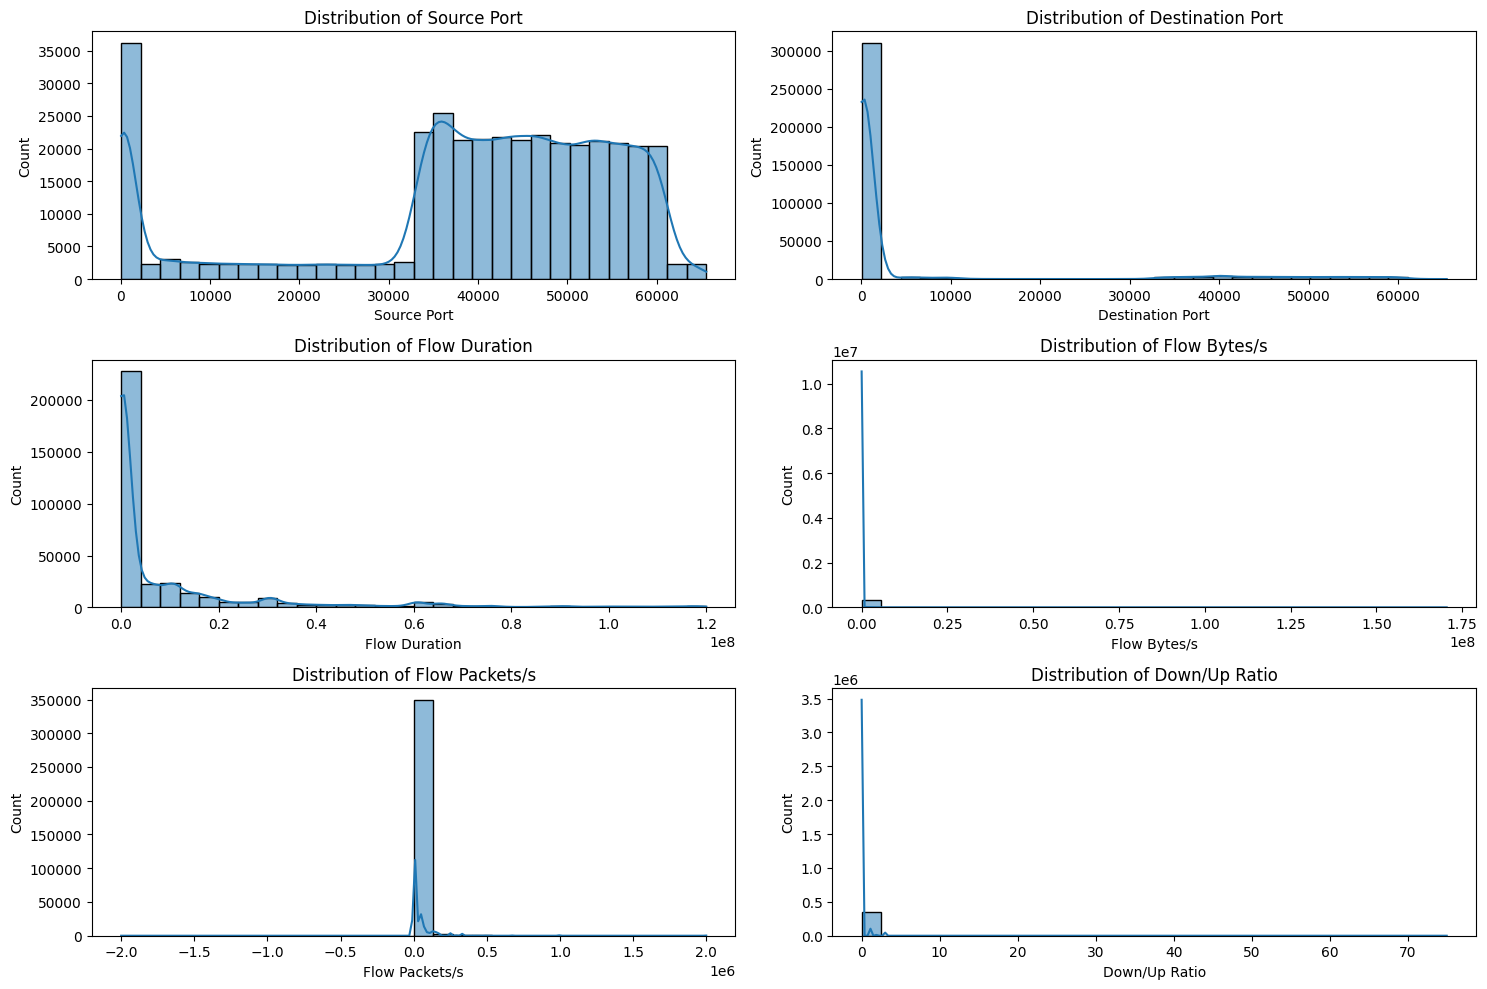

In [162]:
# Distribution plots for individual features
plt.figure(figsize=(15, 10))
for i, column in enumerate(flow_info_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(flow_info_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

The 'Source Port' distribution, spanning from 68 to 65531, highlights a wide spectrum of source port values, indicating a diverse range of communication sources. Similarly, the 'Destination Port' plot showcases a substantial range from 25 to 65428, emphasizing the variability in destination ports and the multitude of communication endpoints.

The 'Flow Duration' plot reveals a right-skewed distribution, suggesting that a majority of flow durations are relatively short, while a tail of longer durations contributes to the overall distributiot.

The right-skewed patterns observed in 'Flow Bytes/s' and 'Flow Packets/s' distributions underscore the heterogeneity in byte rates and packet rates across flows. The elongated tails on the right side of the distributions indicate the presence of significant outliers with exceptionally high byte and packet ra The presence of negative values in 'Flow Packets/s' indicates potential anomalies or specific characteristics within the dataset.tes.

The 'Down/Up Ratio' distribution indicates an asymmetrical distribution leaning towards lower ratios, suggesting that the majority of flows have a higher volume of downlink data compared to uplink data. This insight is valuable for understanding the prevailing directionality in network communication.

In [163]:
# Identify rows with negative Flow Packets/s
negative_flow_packets_rows_df = flow_info_df[flow_info_df['Flow Packets/s'] < 0]

# Count of rows with negative Flow Packets/s
count_negative_flow_packets = negative_flow_packets_rows_df.shape[0]
print(f"Count of rows with negative Flow Packets/s: {count_negative_flow_packets}")

# Display rows with negative Flow Packets/s
print("\nRows with negative Flow Packets/s:")
print(negative_flow_packets_rows_df[['Flow Packets/s']])

Count of rows with negative Flow Packets/s: 1

Rows with negative Flow Packets/s:
        Flow Packets/s
276182      -2000000.0



With only one row featuring an extreme negative 'Flow Packets/s' value of -2000000.0, it is advisable to remove this outlier. Doing so will enhance the dataset's integrity, ensuring a more accurate representation and reliable analysis without the influence of this exceptional case.

In [164]:
df = df[df['Flow Packets/s'] >= 0]

## Subflow Information

In [165]:
subflow_info_columns = ['Subflow Fwd Packets', 'Subflow Bwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes']
subflow_info_df = df[subflow_info_columns]

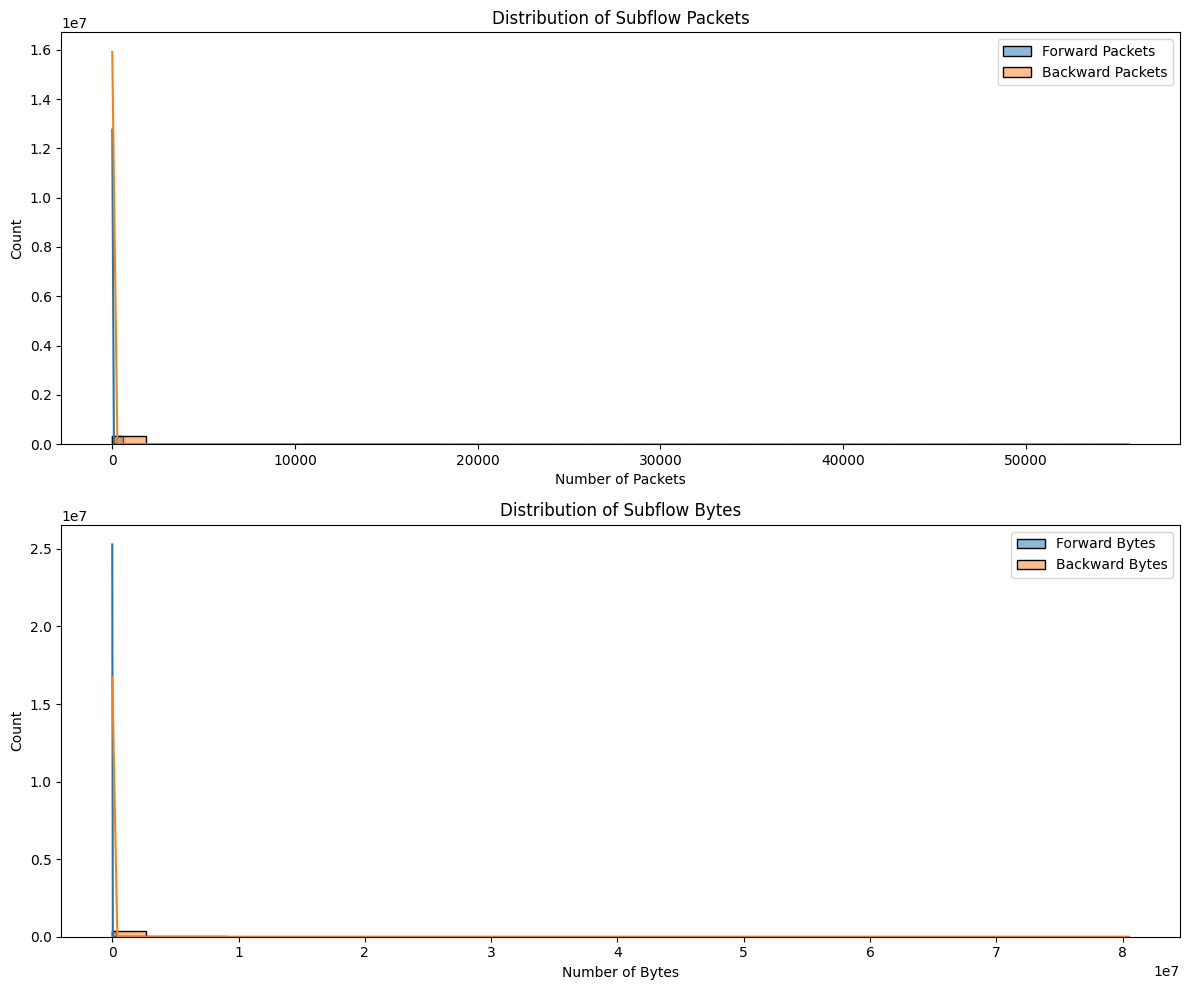

In [166]:
plt.figure(figsize=(12, 10))

# Subflow Fwd Packets and Bwd Packets
plt.subplot(2, 1, 1)
sns.histplot(data=subflow_info_df, x='Subflow Fwd Packets', bins=30, kde=True, label='Forward Packets')
sns.histplot(data=subflow_info_df, x='Subflow Bwd Packets', bins=30, kde=True, label='Backward Packets')
plt.title('Distribution of Subflow Packets')
plt.xlabel('Number of Packets')
plt.legend()

# Subflow Fwd Bytes and Bwd Bytes
plt.subplot(2, 1, 2)
sns.histplot(data=subflow_info_df, x='Subflow Fwd Bytes', bins=30, kde=True, label='Forward Bytes')
sns.histplot(data=subflow_info_df, x='Subflow Bwd Bytes', bins=30, kde=True, label='Backward Bytes')
plt.title('Distribution of Subflow Bytes')
plt.xlabel('Number of Bytes')
plt.legend()

plt.tight_layout()
plt.show()


In [167]:
subflow_info_stats = subflow_info_df.describe()
print("Descriptive Statistics for Subflow Information:")
subflow_info_stats

Descriptive Statistics for Subflow Information:


,Subflow Fwd Packets,Subflow Bwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes
count,353413.000000,353413.000000,3.534130e+05,3.534130e+05
mean,7.370023,10.550622,6.831059e+02,1.135242e+04
std,67.204422,192.268198,1.947917e+04,2.772408e+05
min,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,0.000000,0.000000e+00,0.000000e+00
50%,2.000000,1.000000,3.100000e+01,3.100000e+01
75%,5.000000,4.000000,4.410000e+02,3.130000e+02
max,17877.000000,55652.000000,9.043781e+06,8.050972e+07


Subflow Fwd Packets has a mean of approximately 7.37, indicating a relatively low average number of forward subflow packets, with a right-skewed distribution concentrated towards lower packet counts. Subflow Bwd Packets, with a mean of about 10.55, suggests a relatively low average number of backward subflow packets, exhibiting a right-skewed pattern with a significant portion of instances having zero backward packets.

In terms of size, Subflow Fwd Bytes has a mean value of around 683.11, indicating a moderate average size for forward subflow bytes. The distribution is right-skewed, with a notable number of instances having zero bytes and a long tail indicating outliers. Subflow Bwd Bytes, with a mean value of approximately 11,352.24, indicates a moderate average size for backward subflow bytes. The distribution is highly right-skewed, with a substantial number of instances having zero bytes and a long tail of outliers.

## Active and idle Duration Statistics

In [168]:
active_columns = ['Active Mean', 'Active Std', 'Active Max', 'Active Min']
idle_columns = ['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
selected_columns = active_columns + idle_columns

active_idle_df = df[selected_columns]

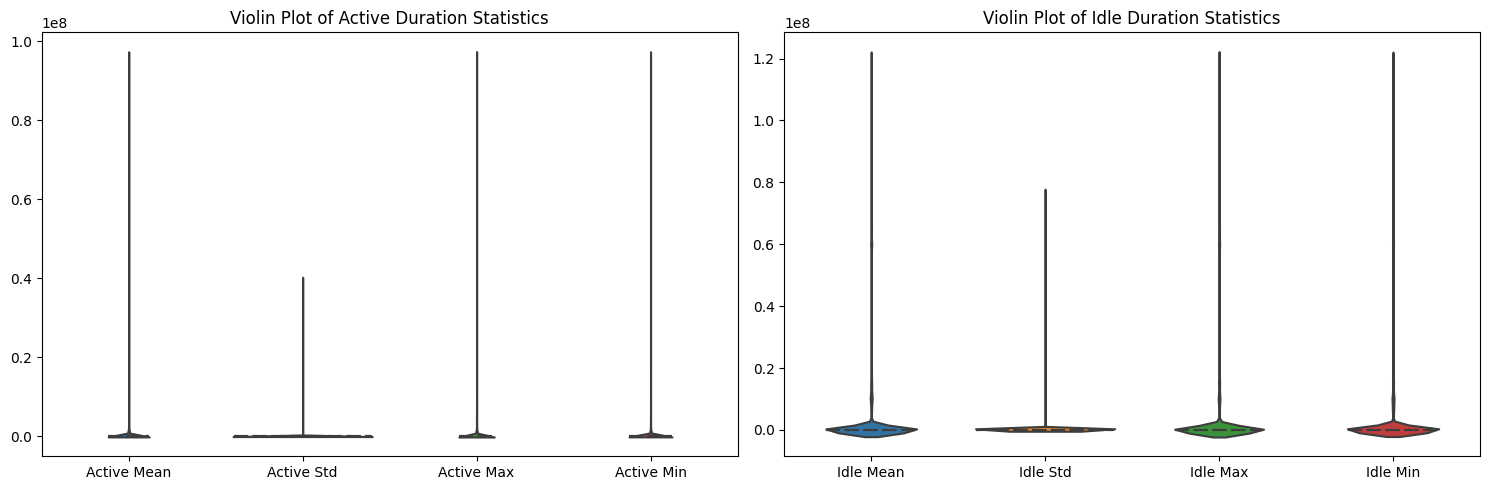

In [169]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=active_idle_df[active_columns], inner="quartile")
plt.title('Violin Plot of Active Duration Statistics')

plt.subplot(1, 2, 2)
sns.violinplot(data=active_idle_df[idle_columns], inner="quartile")
plt.title('Violin Plot of Idle Duration Statistics')

plt.tight_layout()
plt.show()

In [170]:
active_idle_df.describe()

,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05
mean,1.626661e+05,2.191590e+04,1.849807e+05,1.455205e+05,3.800080e+06,2.862598e+05,4.051913e+06,3.580055e+06
std,8.818258e+05,2.861753e+05,1.019890e+06,8.422817e+05,1.411974e+07,2.800095e+06,1.478853e+07,1.381858e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.718488e+07,4.020815e+07,9.718488e+07,9.718488e+07,1.199514e+08,7.737303e+07,1.199514e+08,1.199514e+08


For 'Active' duration, the mean value stands at 162,666, indicating the average duration of active sessions. The distribution is right-skewed, as suggested by the large standard deviation of 21,916. Notably, the maximum active duration reaches 97,184,880, signifying the presence of outliers or very long active sessions. Conversely, the minimum active duration is 0, suggesting a substantial number of sessions with no recorded active time.

Turning to 'Idle' duration, the mean value is 3,800,080, representing the average duration of idle sessions. Similar to the active mean, the distribution is right-skewed, evident from the considerable spread indicated by the standard deviation of 286,259. The maximum idle duration is notably high at 119,951,400, pointing towards the existence of outliers or very long idle sessions. Similar to the active duration, the minimum idle duration is 0, highlighting sessions with no recorded idle time.

## Ratios and Window sizes

In [171]:
ratio_columns = ['min_seg_size_forward', 'act_data_pkt_fwd']
window_size_columns = ['Init_Win_bytes_forward', 'Init_Win_bytes_backward']

ratio_window_df = df[ratio_columns + window_size_columns]

'min_seg_size_forward': This column likely represents the minimum segment size observed in the forward direction during a network flow. In networking, the segment size refers to the amount of data transmitted in a single segment, and this minimum value can be crucial for understanding the efficiency and characteristics of data transmission.

'act_data_pkt_fwd': This column appears to represent the count of actual data packets transmitted in the forward direction during a network flow. It provides insights into the volume of meaningful data being transferred in the forward direction, excluding control or header packets.

'Init_Win_bytes_forward': This column likely represents the initial window size in bytes for data transmission in the forward direction. In TCP (Transmission Control Protocol), the window size determines the amount of data that can be sent before receiving an acknowledgment, influencing the efficiency of data transfer.

'Init_Win_bytes_backward': Similar to the forward window size, this column likely represents the initial window size in bytes for data transmission in the backward (reverse) direction. It indicates the initial capacity for receiving data in the backward flow of the network communication.

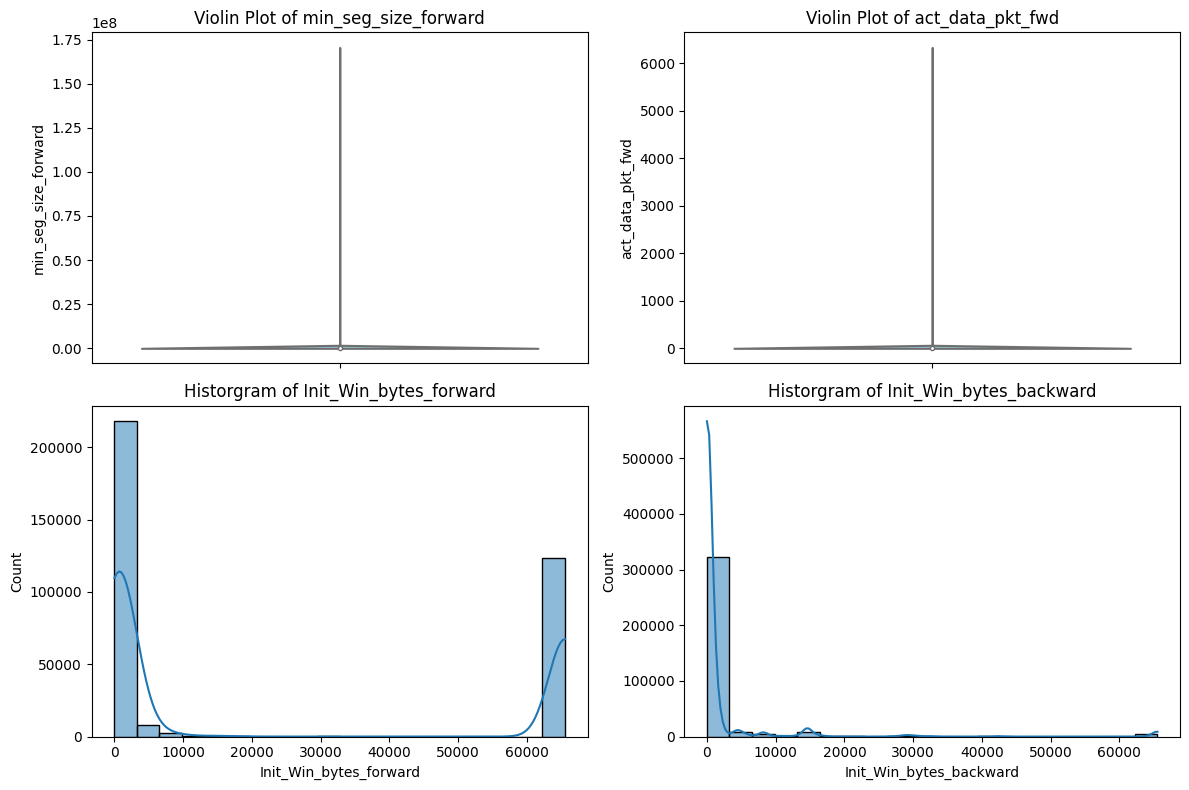

In [172]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, column in enumerate(ratio_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(y=ratio_window_df[column], color='skyblue')
    plt.title(f'Violin Plot of {column}')

for i, column in enumerate(window_size_columns, 3):
    plt.subplot(2, 2, i)
    sns.histplot(ratio_window_df[column], bins=20, kde=True)
    plt.title(f'Historgram of {column}')

plt.tight_layout()
plt.show()

In [173]:
ratio_window_df.describe()

,min_seg_size_forward,act_data_pkt_fwd,Init_Win_bytes_forward,Init_Win_bytes_backward
count,3.534130e+05,353413.000000,353413.000000,353413.000000
mean,5.095364e+02,1.528826,23533.332424,2045.315062
std,2.868443e+05,14.953371,30785.165049,8557.887370
min,-1.000000e+00,0.000000,-1.000000,-1.000000
25%,2.000000e+01,0.000000,33.000000,-1.000000
50%,3.200000e+01,0.000000,1506.000000,-1.000000
75%,3.200000e+01,1.000000,65535.000000,349.000000
max,1.705248e+08,6335.000000,65535.000000,65535.000000


For 'min_seg_size_forward', the data shows a wide range of values with a mean of 509.54 and a standard deviation of 286,844. The minimum value of -1 suggests the presence of some anomalies, and the majority of the data falls within smaller segment sizes.

Regarding 'act_data_pkt_fwd', the average count of actual data packets transmitted in the forward direction is 1.53, with a notable standard deviation of 14.95. This suggests significant variability in the volume of meaningful data being transferred, as indicated by the maximum count of 6335.

Moving on to 'Init_Win_bytes_forward', the mean of 23,533.33 indicates the average initial window size in bytes for data transmission in the forward direction. The distribution has a wide range, with the maximum value reaching 65,535. Notably, a minimum value of -1 suggests the presence of some anomalies or missing data.

Similarly, 'Init_Win_bytes_backward' exhibits a mean of 2045.32 and a standard deviation of 8557.89. The distribution is right-skewed, with a notable range of values. The presence of -1 as the minimum value suggests potential anomalies or missing data.

In [174]:
# Identify rows with negative values in 'Init_Win_bytes_backward'
negative_init_win_bytes_backward_rows = ratio_window_df[ratio_window_df['Init_Win_bytes_backward'] < 0]
count_negative_init_win_bytes_backward = negative_init_win_bytes_backward_rows.shape[0]
print(f"Count of rows with negative Init_Win_bytes_backward: {count_negative_init_win_bytes_backward}")

# Identify rows with negative values in 'Init_Win_bytes_forward'
negative_init_win_bytes_forward_rows = ratio_window_df[ratio_window_df['Init_Win_bytes_forward'] < 0]
count_negative_init_win_bytes_forward = negative_init_win_bytes_forward_rows.shape[0]
print(f"Count of rows with negative Init_Win_bytes_forward: {count_negative_init_win_bytes_forward}")

# Identify rows with negative values in 'min_seg_size_forward'
negative_min_seg_size_forward_rows = ratio_window_df[ratio_window_df['min_seg_size_forward'] < 0]
count_negative_min_seg_size_forward = negative_min_seg_size_forward_rows.shape[0]
print(f"Count of rows with negative min_seg_size_forward: {count_negative_min_seg_size_forward}")

Count of rows with negative Init_Win_bytes_backward: 178951
Count of rows with negative Init_Win_bytes_forward: 76651
Count of rows with negative min_seg_size_forward: 9


There seems to be a substantial amount of data with negative values for init win bytes forward and backward. The columns 'Init_Win_bytes_forward' and 'Init_Win_bytes_backward' represent the initial window size in bytes for data transmission in the forward and backward directions, respectively. These values are part of the TCP (Transmission Control Protocol) handshake process during the initiation of a connection. While they might not be direct indicators of Android malware, they can provide insights into network behavior that may be relevant for identifying potential threats. It does not seem responsible to remove the rows with negative values in these columns. We will leave it for now and keep it in mind when selecting which columns to use to build our model.

# Saving cleaned data
The data clean in this file will be saved to a new csv file, so that other files can use the cleaned data.

In [176]:
df.to_csv('Android_Malware_clean_eda.csv', index=False)